In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv("titanic.csv")

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB
None


In [45]:
missing_values = data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)



Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [46]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
data.dropna(subset=["Embarked"], inplace=True)
data["Cabin"].fillna("Unknown", inplace=True)
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [48]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [49]:
data.duplicated().sum()

0

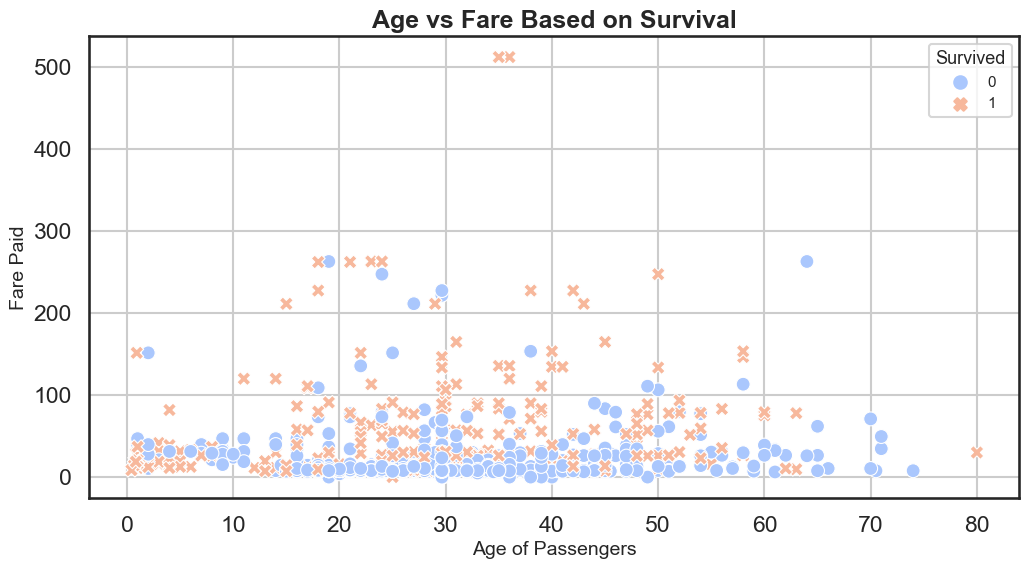

In [50]:
sns.set(style="white", context="talk")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x="Age", y="Fare", hue="Survived", style="Survived", palette="coolwarm", s=100)
plt.title("Age vs Fare Based on Survival", fontsize=18, fontweight='bold')
plt.xlabel("Age of Passengers", fontsize=14)
plt.ylabel("Fare Paid", fontsize=14)
plt.legend(title="Survived", loc="upper right", title_fontsize='13', fontsize='11')
plt.grid(True)
plt.show()


INSIGHTS:

-Higher fares are generally associated with a higher probability of survival.

-Young children have a higher survival rate compared to other age groups.

-Passengers paying lower fares had a higher chance of not surviving.

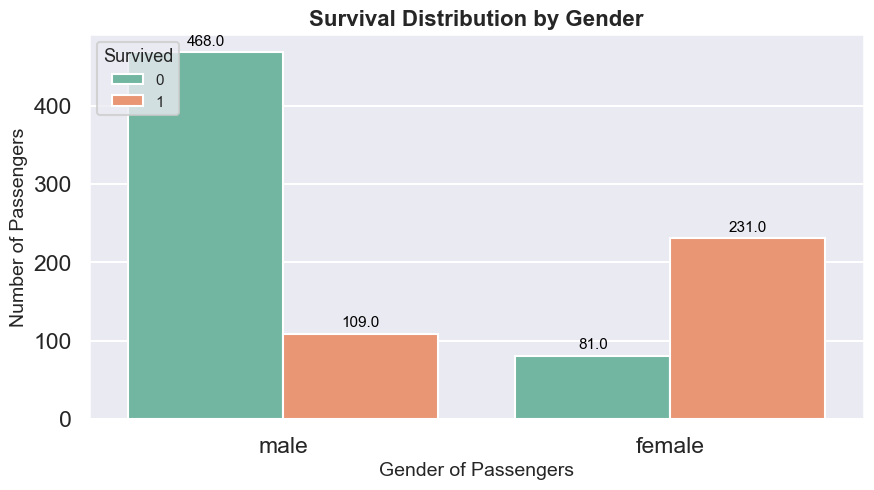

In [51]:
sns.set(style="darkgrid", context="talk")
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="Sex", hue="Survived", palette="Set2")
plt.title("Survival Distribution by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Gender of Passengers", fontsize=14)
plt.ylabel("Number of Passengers", fontsize=14)
plt.legend(title="Survived", loc="upper left", title_fontsize='13', fontsize='11')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()

Insights:

-The survival rate for females (231) is significantly higher than for males (109).

-549 individuals survived out of the total sample.


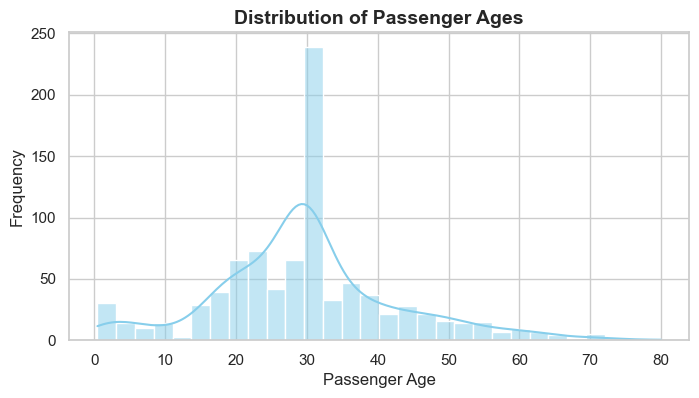

In [54]:
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(8, 4))
sns.histplot(data["Age"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Passenger Ages", fontsize=14, fontweight='bold')
plt.xlabel("Passenger Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()

INSIGHTS:

-The distribution of passenger ages is right-skewed, indicating a larger proportion of younger passengers.

-The majority of passengers fall within the 20-30 age range, with a peak around 30 years old.

-There is a significant drop in passenger numbers after the age of 40, suggesting a lower proportion of older passengers.